In [1]:
%pylab inline
from classy import *

Populating the interactive namespace from numpy and matplotlib
Version:  0.0.16


## Iris

In [2]:
data=load_excel('data/iris.xls')
data_train,data_test=split(data,test_size=0.2)

iris.data 151 5
150 vectors of length 4
Feature names: 'petal length in cm', 'petal width in cm', 'sepal length in cm', 'sepal width in cm'
Target values given.
Target names: 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'
Mean:  [ 3.75866667  1.19866667  5.84333333  3.054     ]
Median:  [ 4.35  1.3   5.8   3.  ]
Stddev:  [ 1.75852918  0.76061262  0.82530129  0.43214658]
Original vector shape:  (150, 4)
Train vector shape:  (120, 4)
Test vector shape:  (30, 4)


In [3]:
len(data.targets),len(data_train.targets),len(data_test.targets),

(150, 120, 30)

In [4]:
C=Perceptron()

In [5]:
timeit(reset=True)
C.fit(data_train.vectors,data_train.targets)
print(("Training time: ",timeit()))

Time Reset
('Training time: ', '0.006078004837036133 seconds ')


In [6]:
print(("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets)))
print(("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets)))

('On Training Set:', 66.666666666666657)
('On Test Set:', 66.666666666666657)


In [7]:
C.coef_  # these are the weights

array([[ -8.4,  -3.4,   1.3,   5.3],
       [  1.1,  -6.1,   0.5, -10. ],
       [ 31.6,  27.6, -21.2, -17.5]])

In [8]:
C=BackProp(hidden_layer_sizes = [4],max_iter=10000,tol=1e-4)

In [9]:
timeit(reset=True)
C.fit(data_train.vectors,data_train.targets)
print(("Training time: ",timeit()))

Time Reset
('Training time: ', '0.6452150344848633 seconds ')


In [10]:
data_train.vectors.shape,data_train.targets.shape

((120, 4), (120,))

In [11]:
print(("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets)))
print(("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets)))

('On Training Set:', 98.333333333333329)
('On Test Set:', 96.666666666666671)


In [12]:
C.weights

[array([[  5.01417920e-01,   7.24123351e-13,   5.24105291e-01,
          -1.31535751e+00],
        [  1.18622033e+00,  -4.66957528e-07,  -9.15263078e-02,
          -1.51182807e+00],
        [  7.38937254e-01,  -1.57798905e-03,  -3.57895679e-01,
           8.74776410e-01],
        [ -4.73245427e-02,   3.31502216e-06,   1.27632460e-01,
           1.06797780e+00]]),
 array([[ -7.90372299e-01,   1.07819361e-01,   6.52942510e-01],
        [ -1.77117250e-09,   4.47442479e-06,  -1.40396531e-39],
        [  7.51372708e-01,   7.21944832e-01,  -2.25284488e-01],
        [  1.56579181e+00,   5.78388845e-01,  -1.54632369e+00]])]

In [13]:
W_inp_hid,W_hid_out=C.weights
print(W_inp_hid)
print("==")
print(W_hid_out)

[[  5.01417920e-01   7.24123351e-13   5.24105291e-01  -1.31535751e+00]
 [  1.18622033e+00  -4.66957528e-07  -9.15263078e-02  -1.51182807e+00]
 [  7.38937254e-01  -1.57798905e-03  -3.57895679e-01   8.74776410e-01]
 [ -4.73245427e-02   3.31502216e-06   1.27632460e-01   1.06797780e+00]]
==
[[ -7.90372299e-01   1.07819361e-01   6.52942510e-01]
 [ -1.77117250e-09   4.47442479e-06  -1.40396531e-39]
 [  7.51372708e-01   7.21944832e-01  -2.25284488e-01]
 [  1.56579181e+00   5.78388845e-01  -1.54632369e+00]]


## XOR Problem - Perceptron

In [14]:
data=load_csv('data/xor.csv')
print() 
print((data.vectors))
print() 
print((data.targets))

4 vectors of length 2
Feature names: 'p1', 'p2'
Target values given.
Target names: '0', '1'
Mean:  [ 0.5  0.5]
Median:  [ 0.5  0.5]
Stddev:  [ 0.5  0.5]

[[ 0.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  1.]]

[0 1 1 0]


In [15]:
C=Perceptron()

In [16]:
C.fit(data.vectors,data.targets)

In [17]:
print((C.predict(data.vectors)))
print(("On Training Set:",C.percent_correct(data.vectors,data.targets)))

[0 0 0 0]
('On Training Set:', 50.0)


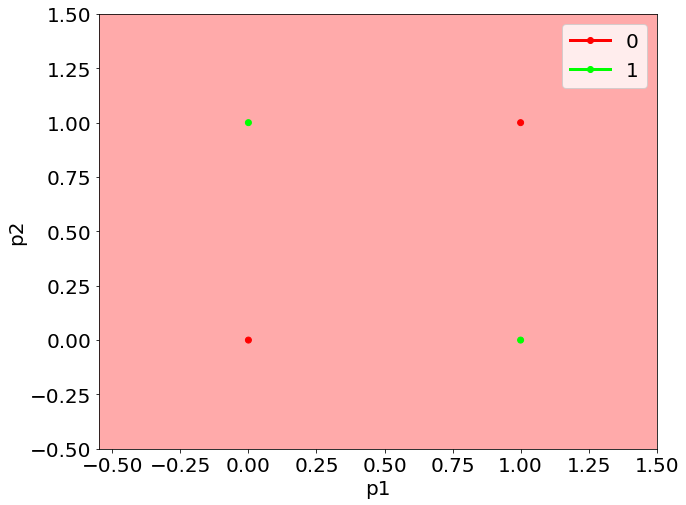

In [18]:
plot2D(data,classifier=C,axis_range=[-.55,1.5,-.5,1.5])

## XOR Problem - Backprop

In [19]:
data.vectors

array([[ 0.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  1.]])

In [20]:
data.targets

array([0, 1, 1, 0])

In [21]:
C=BackProp(hidden_layer_sizes = [5],max_iter=10000,tol=1e-4)

In [22]:
C.fit(data.vectors,data.targets)

In [23]:
print((C.predict(data.vectors)))
print(("On Training Set:",C.percent_correct(data.vectors,data.targets)))


[0 1 1 0]
('On Training Set:', 100.0)


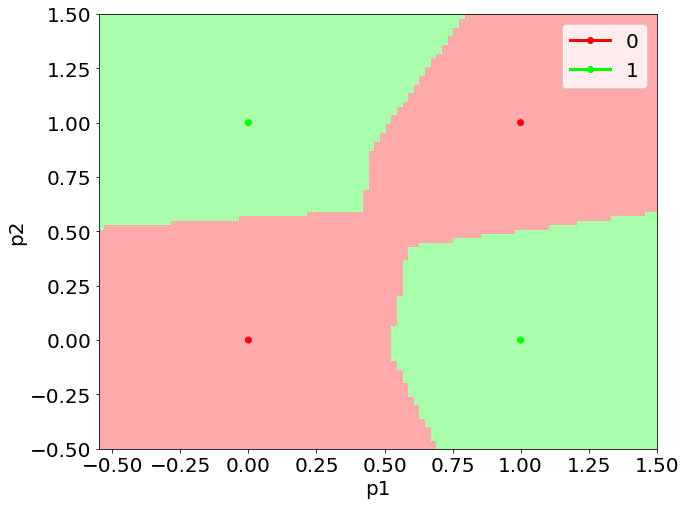

In [24]:
plot2D(data,classifier=C,axis_range=[-.55,1.5,-.5,1.5])

In [25]:
print((data.vectors))
print()
print((data.targets))

[[ 0.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  1.]]

[0 1 1 0]


In [26]:
C.output(data.vectors)

[array([[  1.01831113e+00,   1.90534269e+00,   0.00000000e+00,
           2.49285791e-01,   0.00000000e+00],
        [  1.31058231e+00,   2.31129715e-05,   0.00000000e+00,
           7.59467427e-04,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           2.24620651e+00,   1.78930977e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           1.99768018e+00,   0.00000000e+00]]), array([[ 0.06029832],
        [ 0.92728785],
        [ 0.94054385],
        [ 0.06926277]])]

In [27]:
h,y=C.output(data.vectors)
print(h)
print() 
print((np.round(h)))
print()
print(y)

[[  1.01831113e+00   1.90534269e+00   0.00000000e+00   2.49285791e-01
    0.00000000e+00]
 [  1.31058231e+00   2.31129715e-05   0.00000000e+00   7.59467427e-04
    0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   2.24620651e+00
    1.78930977e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.99768018e+00
    0.00000000e+00]]

[[ 1.  2.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 0.  0.  0.  2.  2.]
 [ 0.  0.  0.  2.  0.]]

[[ 0.06029832]
 [ 0.92728785]
 [ 0.94054385]
 [ 0.06926277]]


In [29]:
C.weights

[array([[  2.92271179e-01,  -1.90531957e+00,  -2.83381318e-08,
          -2.48526323e-01,  -1.78979754e+00],
        [ -1.31122171e+00,  -1.90546166e+00,  -3.18856261e-19,
           1.99692072e+00,   1.78936911e+00]]), array([[  1.86464160e+00],
        [ -2.31509246e+00],
        [  3.52148889e-25],
        [ -1.35213790e+00],
        [  3.18297629e+00]])]

In [30]:
data.vectors.shape

(4, 2)

## Curvy data

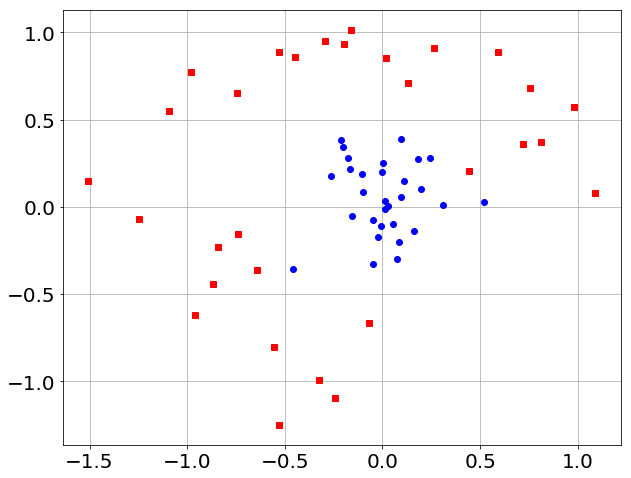

In [31]:
N=30
x1=randn(N)*.2
y1=randn(N)*.2

plot(x1,y1,'bo')

a=linspace(0,3*pi/2,N)
x2=cos(a)+randn(N)*.2
y2=sin(a)+randn(N)*.2

plot(x2,y2,'rs')



In [32]:
vectors=vstack([hstack([atleast_2d(x1).T,atleast_2d(y1).T]),
        hstack([atleast_2d(x2).T,atleast_2d(y2).T]),
        ])
targets=concatenate([zeros(N),ones(N)])
target_names=['center','around']
feature_names=['x','y']

In [33]:
data=Struct(vectors=vectors,targets=targets,
                target_names=target_names,feature_names=feature_names)

('On Training Set:', 56.666666666666664)


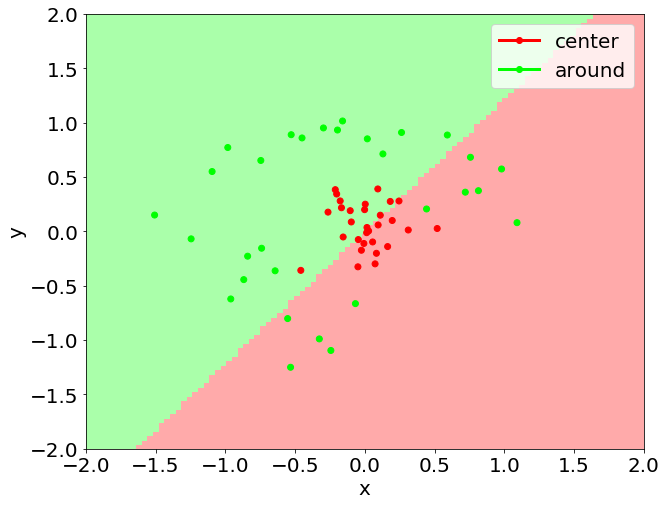

In [34]:
C=Perceptron()
C.fit(data.vectors,data.targets)
print(("On Training Set:",C.percent_correct(data.vectors,data.targets)))
plot2D(data,classifier=C,axis_range=[-2,2,-2,2])

('On Training Set:', 98.333333333333329)


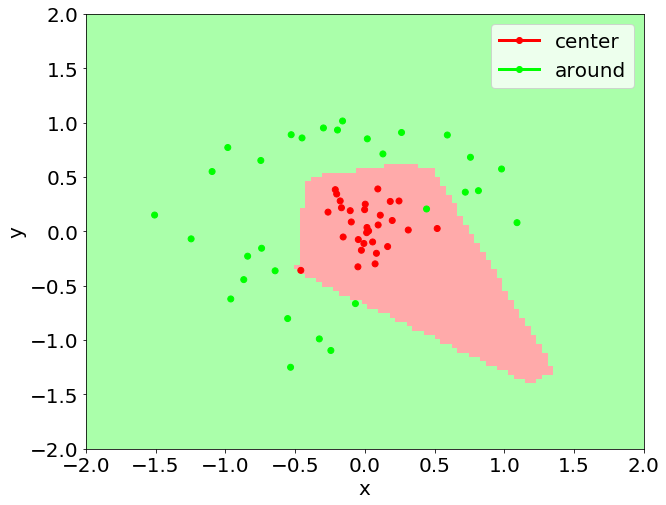

In [42]:
C=BackProp(hidden_layer_sizes = [6],max_iter=10000,tol=1e-4)
C.fit(data.vectors,data.targets)
print(("On Training Set:",C.percent_correct(data.vectors,data.targets)))
plot2D(data,classifier=C,axis_range=[-2,2,-2,2])

('On Training Set:', 96.666666666666671)


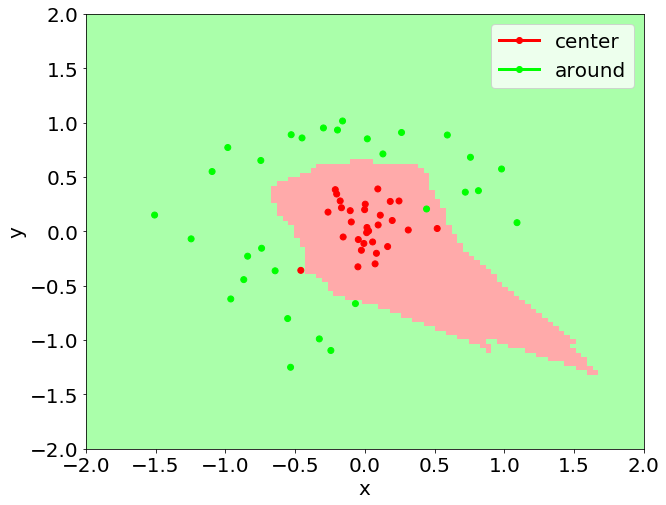

In [43]:
C=kNearestNeighbor()
C.fit(data.vectors,data.targets)
print(("On Training Set:",C.percent_correct(data.vectors,data.targets)))
plot2D(data,classifier=C,axis_range=[-2,2,-2,2])

('On Training Set:', 100.0)


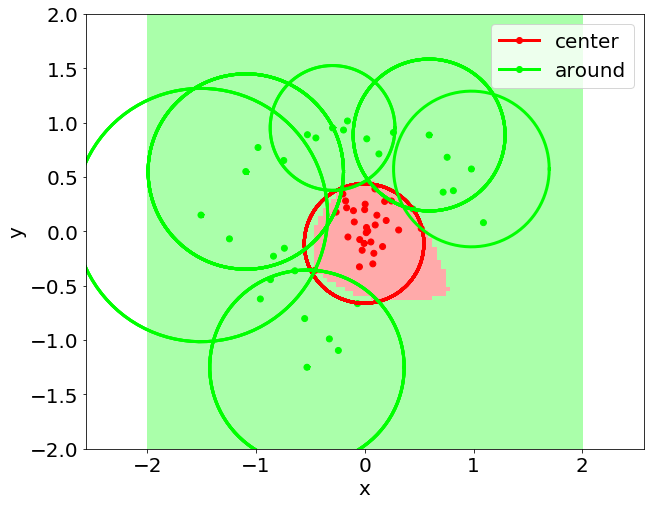

In [44]:
C=CSC()
C.fit(data.vectors,data.targets)
print(("On Training Set:",C.percent_correct(data.vectors,data.targets)))
C.plot_centers()
plot2D(data,classifier=C,axis_range=[-2,2,-2,2])


## 8x8 - Autoencoder

In [45]:
vectors=eye(8)
targets=arange(1,9)
print((vectors,targets))

(array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]]), array([1, 2, 3, 4, 5, 6, 7, 8]))


In [47]:
C=BackProp(activation='logistic',hidden_layer_sizes = [3],max_iter=10000,tol=1e-4)
C.fit(vectors,targets)
print((C.predict(vectors)))

[1 2 3 4 5 6 7 8]


In [48]:
h,y=C.output(vectors)

In [49]:
h

array([[ 0.95188517,  0.95754607,  0.0190463 ],
       [ 0.95842582,  0.01367441,  0.93215547],
       [ 0.95640847,  0.9240123 ,  0.9521281 ],
       [ 0.04617869,  0.89309455,  0.02549217],
       [ 0.02920632,  0.01474587,  0.11884015],
       [ 0.95592761,  0.16780924,  0.01879628],
       [ 0.02321577,  0.01915328,  0.96401543],
       [ 0.02920981,  0.93431338,  0.93549868]])

In [50]:
h.round()

array([[ 1.,  1.,  0.],
       [ 1.,  0.,  1.],
       [ 1.,  1.,  1.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  1.]])

In [51]:
y.round()

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [52]:
C.predict(vectors)

array([1, 2, 3, 4, 5, 6, 7, 8])

In [53]:
y.shape

(8, 8)

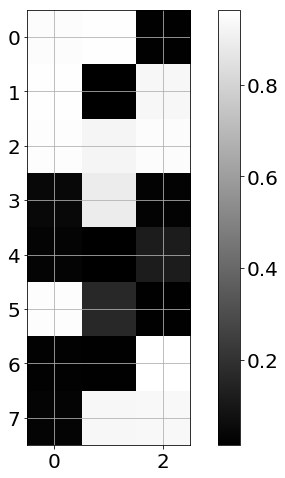

In [54]:
imshow(h,interpolation='nearest',cmap=cm.gray)
colorbar()

In [56]:
weights_xh,weights_hy=C.weights

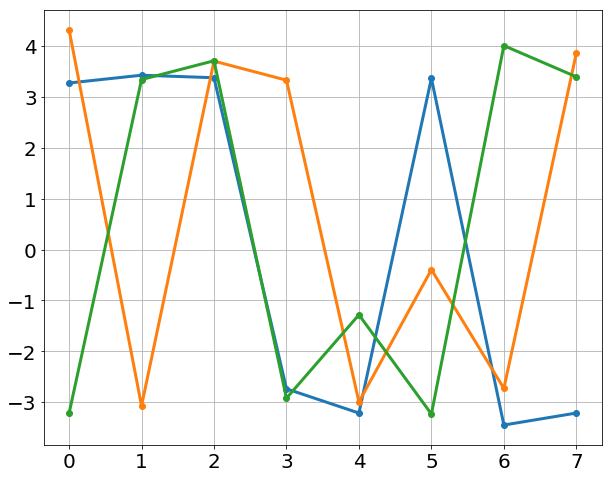

In [57]:
plot(weights_xh,'-o')

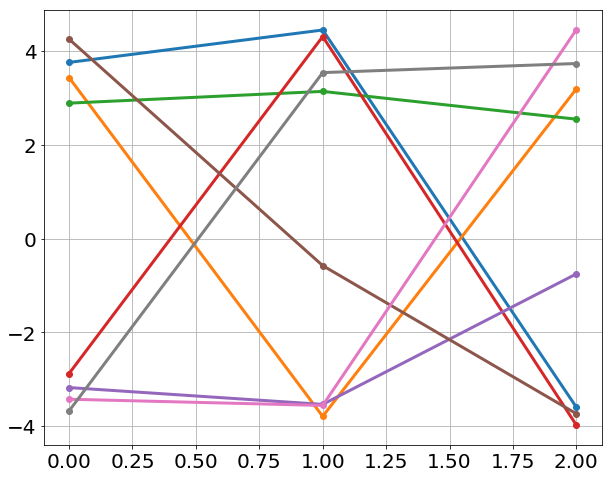

In [58]:
plot(weights_hy,'-o')

## Tuning the number of hidden units

In [59]:
data=load_excel('data/iris.xls')
data_train,data_test=split(data,test_size=0.75)

iris.data 151 5
150 vectors of length 4
Feature names: 'petal length in cm', 'petal width in cm', 'sepal length in cm', 'sepal width in cm'
Target values given.
Target names: 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'
Mean:  [ 3.75866667  1.19866667  5.84333333  3.054     ]
Median:  [ 4.35  1.3   5.8   3.  ]
Stddev:  [ 1.75852918  0.76061262  0.82530129  0.43214658]
Original vector shape:  (150, 4)
Train vector shape:  (37, 4)
Test vector shape:  (113, 4)


select which number of hidden units to use

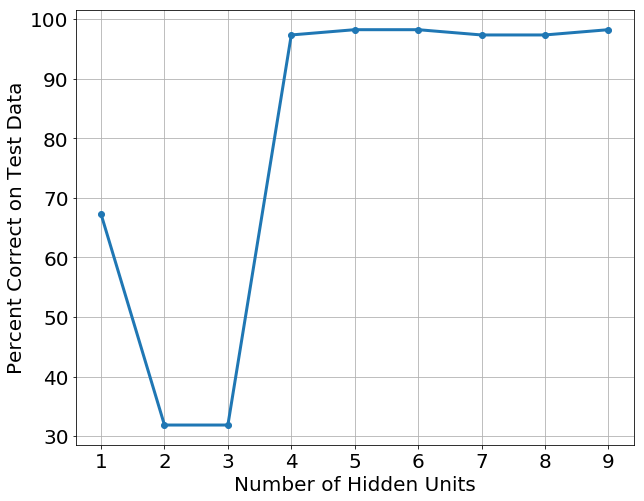

In [61]:
hidden=list(range(1,10))
percent_correct=[]
for n in hidden:
    C=BackProp(hidden_layer_sizes = [n],tol=1e-4,max_iter=10000)
    C.fit(data_train.vectors,data_train.targets)
    percent_correct.append(C.percent_correct(data_test.vectors,data_test.targets))
    
plot(hidden,percent_correct,'-o')
xlabel('Number of Hidden Units')
ylabel('Percent Correct on Test Data')